In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
im_bgr = cv2.imread('hedgehog.jpg')
im_rbg = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
im = im_rbg.astype(np.float)

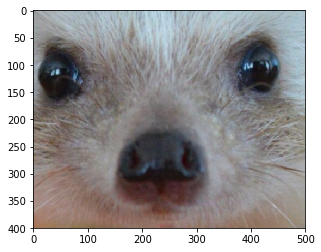

In [3]:
roi = im[500:900, 800:1300]
plt.imshow(roi.astype(int))

roi = roi[:,:,0]

In [ ]:
def shifts(im, displacement=1):
    """
    Shift image by 8 motion vectors
    0 1 2
    3   4
    5 6 7
    """
    
    (size_x, size_y, size_z) = im.shape
    array_im = np.zeros((8, size_x, size_y, size_z), dtype=np.float)

    array_im[1] = np.pad(im, ((0, displacement), (0,0), (0,0)), mode='constant')[displacement:, :, :]
    array_im[6] = np.pad(im, ((displacement,0), (0,0), (0,0)), mode='constant')[:size_x, :, :]
    array_im[3] = np.pad(im, ((0,0), (0,displacement), (0,0)), mode='constant')[:, displacement:, :]
    array_im[4] = np.pad(im, ((0,0), (displacement,0), (0,0)), mode='constant')[:, :size_y, :]
    array_im[0] = np.pad(im, ((0,displacement), (0,displacement), (0,0)), mode='constant')[displacement:, displacement:, :]
    array_im[2] = np.pad(im, ((0,displacement), (displacement, 0), (0,0)), mode='constant')[displacement:, :size_y, :]
    array_im[5] = np.pad(im, ((displacement,0), (0,displacement), (0,0)), mode='constant')[:size_x, displacement:, :]
    array_im[7] = np.pad(im, ((displacement,0), (displacement,0), (0,0)), mode='constant')[:size_x, :size_y, :]
    
    return array_im

$ X_k = D_k B_k M_k X + N_k $

where: $M_k = I$ always, and $ B_k = I$ for now

$X_k$ has shape $(N_1, N_2)$, and $X$ has shape $(qN_1, qN_2)$

Here $q = 2$

In [5]:
q = 2
(Na, Nb) = roi.shape # HR image size
(N1, N2) = (int(Na/q), int(Nb/q)) # New LR images size

In [13]:
nb_lr_images = 8
X = np.zeros((nb_lr_images, N1, N2)) # LR images

for k in range(nb_lr_images):
    # M, B = 1, 1
    # roi_tmp = B * M * roi
    
    # roi_tmp = roi_tmp[::q, ::q]  # D downsamples the matrix with a factor q
    
    noise = np.random.normal(0,10, (N1, N2)) # generate normal noise in LR image
    X[k] = roi[::q, ::q] + noise

In [14]:
def createLRrSamples(image, q=2, nb_lr_images=8):
    """
    Generates $ X_k = D_k B_k M_k X + N_k $
        where: $M_k = I$ always, and $ B_k = I$ for now.
        $X_k$ has shape $(N_1, N_2)$, and $X$ has shape $(qN_1, qN_2)$.
    """
    
    (Na, Nb) = image.shape # HR image size
    (N1, N2) = (int(Na/q), int(Nb/q)) # New LR images size
    
    X = np.zeros((nb_lr_images, N1, N2)) # LR images
    
    for k in range(nb_lr_images):
        M, B = 1, 1
        image_tmp = B * M * image   
        noise = np.random.normal(0,10, (N1, N2)) # generate normal noise in LR image
        X[k] = image[::q, ::q] + noise
    return X

In [15]:
lrImages = createLRrSamples(roi)

In [23]:
from super_resolution_utils import createLRrSamples

In [24]:
images = createLRrSamples(roi, nb_lr_images=16, q=4, noise_variance=5)

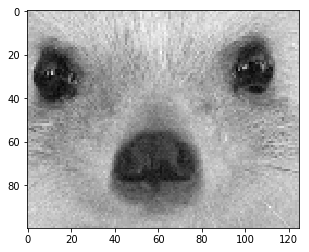

In [25]:
plt.imshow(images[15], cmap='gray')